<a href="https://colab.research.google.com/github/moerezapa/K-Anonymity/blob/main/Anonymity_TeknoDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data and Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data pre-processing
import pandas as pd
import numpy as np
import io

# visualizating
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import folium # map rendering library

# formatting date data
from datetime import datetime

# merging dataframe
from functools import reduce

# feature scaling
from sklearn.preprocessing import MinMaxScaler

# label ncoding
from sklearn import preprocessing

In [ ]:
# display dataframe full information on each row
pd.set_option('display.max_colwidth', None)

path_drive = "/content/drive/MyDrive/Business/KULIAH/Tekno DB/"

In [ ]:
file = pd.ExcelFile(path_drive + "dataset.xls")
dataset_raw = pd.read_excel(file, "MASTER DATA PEGAWAI 2018", header= 2)
dataset_raw

,KODE UNIT,Jenis Jabatan,NO.,UNIT,HOME BASE,SUB,NO..1,N A M A,JABATAN,JC,TMT Jabatan,No. Karpeg,NIP Lama,N I P,TMT CPNS,TMT PNS,No. KTP,Masa Kerja,Pangkat,Gol,TMT. Gol,Fungsional Tertentu/Sub,Tempat Lahir,Tgl. Lahir,JK,Umur,Masa Pensiun,Tahun Pensiun,Pendidikan,Jurusan,Thn. Lulus,Sekolah/ Universitas,Agama,Alamat,No. Telp,Ket.,Catatan,Pend. & JK,Gol & JK,Umur,Umur & Unit,umUR & jk,jaBAT & Umur,jaBAT & Umur & JK,Gol & Unit,Pend. Unit,Agama & Unit & JK,Masa kerja,Unit Kerja & Masa Kerja & JK,Unnamed: 49
0,16.0,E2,1.0,BAAK,NaN,BAUK,E2,"Drs. Ismail Muhtar, M.Si",Kepala Biro Administrasi Akademik dan Kemahasiswaan,14.0,2013-06-30 00:00:00,A.094476,130701965,19580523 197902 1 002,1979-02-01,1980-01-03 00:00:00,NaN,42 Thn 10 Bln,Pembina Utama Madya,IV/d,2017-10-01 00:00:00,-,Ujung Pandang,1958-05-23 00:00:00,L,63 Thn 6 Bln,01/06/2018,2018.0,S2,Administrasi Pembangunan,1993,UNHAS,Islam,BTN Minasa Upa Blok F9/13 Makassar,864484-081524088966,Pensiun,PNS,BAAKS2LPensiun,BAAKIV/dLPensiun,Di atas 56,BAAKDi atas 56,BAAKDi atas 56LPensiun,Kepala Biro Administrasi Akademik dan KemahasiswaanDi atas 56,Kepala Biro Administrasi Akademik dan KemahasiswaanDi atas 56LPensiun,BAAKIV/d,BAAKS2,BAAKIslamLPensiun,Di atas 30,BAAKDi atas 30LPensiun,NaN
1,16.0,E3,2.0,BAAK,NaN,Bagian Pendidikan dan Kerjasama,E3,"Drs. Bakkarang, M.Pd",Kepala Bagian Pendidikan dan Kerjasama,12.0,2017-06-02 00:00:00,E.341788,131598485,19641231 198602 1 004,1986-02-01,1988-01-01 00:00:00,7371136908640002,35 Thn 10 Bln,Pembina Tingkat I,IV/b,2009-10-01 00:00:00,-,Belajen,1964-12-31 00:00:00,L,56 Thn 11 Bln,01/01/2023,2023.0,S2,Pend. Ilmu Pengetahuan Sosial,2005,PPs-UNM,Islam,Jl.Manggala Raya Blok 7/156 Antang,5051264-490223,Aktif,PNS,BAAKS2LAktif,BAAKIV/bLAktif,Di atas 56,BAAKDi atas 56,BAAKDi atas 56LAktif,Kepala Bagian Pendidikan dan KerjasamaDi atas 56,Kepala Bagian Pendidikan dan KerjasamaDi atas 56LAktif,BAAKIV/b,BAAKS2,BAAKIslamLAktif,Di atas 30,BAAKDi atas 30LAktif,NaN
2,16.0,E4,3.0,BAAK,NaN,Subbag. Pendidikan dan Evaluasi,E4,Dra. Andi Farida,Kasubbag. Pendidikan dan Evaluasi,9.0,2015-09-09 00:00:00,E.009553,131642588,19660929 198603 2 001,1986-03-01,1987-01-08 00:00:00,7371136909660000,35 Thn 9 Bln,Penata Tingkat I,III/d,2011-10-01 00:00:00,-,Selayar,1966-09-29 00:00:00,P,55 Thn 2 Bln,01/10/2024,2024.0,S1,Ilmu Administrasi,1992,STISIPOL,Islam,BTN Gowa Sarana Indah Blok D10/18 Gowa,888254-081342625254,Aktif,PNS,BAAKS1PAktif,BAAKIII/dPAktif,46-55,BAAK46-55,BAAK46-55PAktif,Kasubbag. Pendidikan dan Evaluasi46-55,Kasubbag. Pendidikan dan Evaluasi46-55PAktif,BAAKIII/d,BAAKS1,BAAKIslamPAktif,Di atas 30,BAAKDi atas 30PAktif,NaN
3,NaN,NaN,4.0,BAAK,NaN,Pendidikan dan Evaluasi,1,-,Analis Data Akademik,7.0,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Lowong,BAAK-,BAAK-,NaN,NaN,NaN,NaN,NaN,BAAK,BAAK,BAAK-,NaN,NaN,NaN
4,16.0,JFU,5.0,BAAK,NaN,Pendidikan dan Evaluasi,2,"Hasnah, S.Sos",Pengolah Data Akademik,6.0,-,E.865488,131904161,19680705 199003 2 004,1990-03-01,1991-01-07 00:00:00,7306084507680006,31 Thn 9 Bln,Penata Tingkat I,III/d,2016-04-01 00:00:00,-,Bangkala,1968-07-05 00:00:00,P,53 Thn 5 Bln,01/08/2026,2026.0,S1,Ilmu Administrasi,2004,UNISMUH,Islam,BTN Romang Polong Indah Blok C1/21 Gowa,885429-085294221930,Aktif,PNS,BAAKS1PAktif,BAAKIII/dPAktif,46-55,BAAK46-55,BAAK46-55PAktif,Pengolah Data Akademik46-55,Pengolah Data Akademik46-55PAktif,BAAKIII/d,BAAKS1,BAAKIslamPAktif,Di atas 30,BAAKDi atas 30PAktif,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [ ]:
# Upload dataset berupa csv
from google.colab import files
uploaded = files.upload()

In [ ]:
file = pd.ExcelFile(io.BytesIO(uploaded['dataset.xls']))
dataset_raw = pd.read_excel(file, "MASTER DATA PEGAWAI 2018", header= 2)
dataset_raw

# Feature Engineering

Kolom tidak sama:
* Kode Unit
* Jenis Jabatan
* Fungsional Tertentu/Sub
* dll

sehingga dihilangkan. Selain itu, juga menghilangkan kolom "NO."

In [ ]:
dataset = dataset_raw[dataset_raw["NO."] <= 408]
dataset = dataset[['UNIT', 'SUB',
       'N A M A', 'JABATAN', 'JC', 'N I P', 'TMT CPNS', 'TMT PNS', 'Masa Kerja',
       'Pangkat ', 'Gol', 'TMT. Gol','Tempat Lahir', 'Tgl. Lahir', 'JK', 'Umur', 'Masa Pensiun',
       'Tahun Pensiun', 'Pendidikan',
       'Sekolah/ Universitas', 'Agama', 'Alamat', 'No. Telp', 'Ket.',
       'Catatan']]
dataset

,UNIT,SUB,N A M A,JABATAN,JC,N I P,TMT CPNS,TMT PNS,Masa Kerja,Pangkat,Gol,TMT. Gol,Tempat Lahir,Tgl. Lahir,JK,Umur,Masa Pensiun,Tahun Pensiun,Pendidikan,Sekolah/ Universitas,Agama,Alamat,No. Telp,Ket.,Catatan
0,BAAK,BAUK,"Drs. Ismail Muhtar, M.Si",Kepala Biro Administrasi Akademik dan Kemahasiswaan,14.0,19580523 197902 1 002,1979-02-01,1980-01-03 00:00:00,42 Thn 10 Bln,Pembina Utama Madya,IV/d,2017-10-01 00:00:00,Ujung Pandang,1958-05-23 00:00:00,L,63 Thn 6 Bln,01/06/2018,2018.0,S2,UNHAS,Islam,BTN Minasa Upa Blok F9/13 Makassar,864484-081524088966,Pensiun,PNS
1,BAAK,Bagian Pendidikan dan Kerjasama,"Drs. Bakkarang, M.Pd",Kepala Bagian Pendidikan dan Kerjasama,12.0,19641231 198602 1 004,1986-02-01,1988-01-01 00:00:00,35 Thn 10 Bln,Pembina Tingkat I,IV/b,2009-10-01 00:00:00,Belajen,1964-12-31 00:00:00,L,56 Thn 11 Bln,01/01/2023,2023.0,S2,PPs-UNM,Islam,Jl.Manggala Raya Blok 7/156 Antang,5051264-490223,Aktif,PNS
2,BAAK,Subbag. Pendidikan dan Evaluasi,Dra. Andi Farida,Kasubbag. Pendidikan dan Evaluasi,9.0,19660929 198603 2 001,1986-03-01,1987-01-08 00:00:00,35 Thn 9 Bln,Penata Tingkat I,III/d,2011-10-01 00:00:00,Selayar,1966-09-29 00:00:00,P,55 Thn 2 Bln,01/10/2024,2024.0,S1,STISIPOL,Islam,BTN Gowa Sarana Indah Blok D10/18 Gowa,888254-081342625254,Aktif,PNS
3,BAAK,Pendidikan dan Evaluasi,-,Analis Data Akademik,7.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Lowong
4,BAAK,Pendidikan dan Evaluasi,"Hasnah, S.Sos",Pengolah Data Akademik,6.0,19680705 199003 2 004,1990-03-01,1991-01-07 00:00:00,31 Thn 9 Bln,Penata Tingkat I,III/d,2016-04-01 00:00:00,Bangkala,1968-07-05 00:00:00,P,53 Thn 5 Bln,01/08/2026,2026.0,S1,UNISMUH,Islam,BTN Romang Polong Indah Blok C1/21 Gowa,885429-085294221930,Aktif,PNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,Komputer,Komputer,Muhammad Alfian S.Kom,Pengelola Laman,6.0,19790915 200910 1 002,2009-10-01,2012-10-01 00:00:00,12 Thn 2 Bln,Penata Muda Tingkat I,III/b,2014-04-01 00:00:00,Ujung Pandang,1979-09-15 00:00:00,L,42 Thn 2 Bln,01/10/2037,2037.0,S1,Univ. Satria Mks,Islam,Tidung III/Stp.2 Blok 18/20 Makassar,NaN,Aktif,PNS
404,Komputer,Komputer,"Nurjannah, S.Sos",Pengadministrasi Umum,5.0,19641116 198903 2 001,1989-03-01,1990-01-07 00:00:00,32 Thn 9 Bln,Penata,III/c,2015-04-01 00:00:00,Ujung Pandang,1964-11-16 00:00:00,P,57 Thn 0 Bln,01/12/2022,2022.0,S1,STIA-YAPPI,Islam,Jl.Yos Sudarso II Lr.154/31 A Makassar,322150,Aktif,PNS
405,FIP,Umum dan Perlengkapan,Amir,Penata Usaha Pimpinan,5.0,19591205 198903 1 001,1989-03-01,1990-01-09 00:00:00,32 Thn 9 Bln,Penata Muda,III/a,2015-10-01 00:00:00,Biringloe,1959-12-05 00:00:00,L,62 Thn 10 Bln,01/01/2018,2018.0,SMA,SMA Persamaan,Islam,Jl.Beringin I No.55 Gowa,434932/081342272789,Pensiun,PNS
406,BAUK,Rumah Tangga,I. Bompo,Pengadministrasi Poliklinik,5.0,19591218 198203 2 002,1982-03-01,1983-01-07 00:00:00,39 Thn 9 Bln,Penata Muda Tingkat I,III/b,2005-04-01 00:00:00,Soppeng,1959-12-18 00:00:00,P,62 Thn 9 Bln,01/01/2018,2018.0,SMA,SMEA Muhammadiyah,Islam,Toddopuli VI Stp 7/26 Blok 33 Mks.,445353,Pensiun,PNS


In [ ]:
dataset['TMT. Gol'] = pd.to_datetime(dataset['TMT. Gol'] , errors = 'coerce')
dataset['TMT CPNS'] = pd.to_datetime(dataset['TMT CPNS'] , errors = 'coerce')
dataset['TMT PNS'] = pd.to_datetime(dataset['TMT PNS'] , errors = 'coerce')
dataset['Tgl. Lahir'] = pd.to_datetime(dataset['Tgl. Lahir'] , errors = 'coerce')
dataset

,UNIT,SUB,N A M A,JABATAN,JC,N I P,TMT CPNS,TMT PNS,Masa Kerja,Pangkat,Gol,TMT. Gol,Tempat Lahir,Tgl. Lahir,JK,Umur,Masa Pensiun,Tahun Pensiun,Pendidikan,Sekolah/ Universitas,Agama,Alamat,No. Telp,Ket.,Catatan
0,BAAK,BAUK,"Drs. Ismail Muhtar, M.Si",Kepala Biro Administrasi Akademik dan Kemahasiswaan,14.0,19580523 197902 1 002,1979-02-01,1980-01-03,42 Thn 10 Bln,Pembina Utama Madya,IV/d,2017-10-01,Ujung Pandang,1958-05-23,L,63 Thn 6 Bln,01/06/2018,2018.0,S2,UNHAS,Islam,BTN Minasa Upa Blok F9/13 Makassar,864484-081524088966,Pensiun,PNS
1,BAAK,Bagian Pendidikan dan Kerjasama,"Drs. Bakkarang, M.Pd",Kepala Bagian Pendidikan dan Kerjasama,12.0,19641231 198602 1 004,1986-02-01,1988-01-01,35 Thn 10 Bln,Pembina Tingkat I,IV/b,2009-10-01,Belajen,1964-12-31,L,56 Thn 11 Bln,01/01/2023,2023.0,S2,PPs-UNM,Islam,Jl.Manggala Raya Blok 7/156 Antang,5051264-490223,Aktif,PNS
2,BAAK,Subbag. Pendidikan dan Evaluasi,Dra. Andi Farida,Kasubbag. Pendidikan dan Evaluasi,9.0,19660929 198603 2 001,1986-03-01,1987-01-08,35 Thn 9 Bln,Penata Tingkat I,III/d,2011-10-01,Selayar,1966-09-29,P,55 Thn 2 Bln,01/10/2024,2024.0,S1,STISIPOL,Islam,BTN Gowa Sarana Indah Blok D10/18 Gowa,888254-081342625254,Aktif,PNS
3,BAAK,Pendidikan dan Evaluasi,-,Analis Data Akademik,7.0,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Lowong
4,BAAK,Pendidikan dan Evaluasi,"Hasnah, S.Sos",Pengolah Data Akademik,6.0,19680705 199003 2 004,1990-03-01,1991-01-07,31 Thn 9 Bln,Penata Tingkat I,III/d,2016-04-01,Bangkala,1968-07-05,P,53 Thn 5 Bln,01/08/2026,2026.0,S1,UNISMUH,Islam,BTN Romang Polong Indah Blok C1/21 Gowa,885429-085294221930,Aktif,PNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,Komputer,Komputer,Muhammad Alfian S.Kom,Pengelola Laman,6.0,19790915 200910 1 002,2009-10-01,2012-10-01,12 Thn 2 Bln,Penata Muda Tingkat I,III/b,2014-04-01,Ujung Pandang,1979-09-15,L,42 Thn 2 Bln,01/10/2037,2037.0,S1,Univ. Satria Mks,Islam,Tidung III/Stp.2 Blok 18/20 Makassar,NaN,Aktif,PNS
404,Komputer,Komputer,"Nurjannah, S.Sos",Pengadministrasi Umum,5.0,19641116 198903 2 001,1989-03-01,1990-01-07,32 Thn 9 Bln,Penata,III/c,2015-04-01,Ujung Pandang,1964-11-16,P,57 Thn 0 Bln,01/12/2022,2022.0,S1,STIA-YAPPI,Islam,Jl.Yos Sudarso II Lr.154/31 A Makassar,322150,Aktif,PNS
405,FIP,Umum dan Perlengkapan,Amir,Penata Usaha Pimpinan,5.0,19591205 198903 1 001,1989-03-01,1990-01-09,32 Thn 9 Bln,Penata Muda,III/a,2015-10-01,Biringloe,1959-12-05,L,62 Thn 10 Bln,01/01/2018,2018.0,SMA,SMA Persamaan,Islam,Jl.Beringin I No.55 Gowa,434932/081342272789,Pensiun,PNS
406,BAUK,Rumah Tangga,I. Bompo,Pengadministrasi Poliklinik,5.0,19591218 198203 2 002,1982-03-01,1983-01-07,39 Thn 9 Bln,Penata Muda Tingkat I,III/b,2005-04-01,Soppeng,1959-12-18,P,62 Thn 9 Bln,01/01/2018,2018.0,SMA,SMEA Muhammadiyah,Islam,Toddopuli VI Stp 7/26 Blok 33 Mks.,445353,Pensiun,PNS


In [ ]:
# new data frame with split value columns 
umur_data = dataset["Umur"].str.split(" ", n = 1, expand = True) 
masakerja_data = dataset["Masa Kerja"].str.split(" ", n = 1, expand = True)

# making separate first name column from new data frame 
dataset["Umur"]= umur_data[0]
dataset["Masa Kerja"]= masakerja_data[0] 
dataset

,UNIT,SUB,N A M A,JABATAN,JC,N I P,TMT CPNS,TMT PNS,Masa Kerja,Pangkat,Gol,TMT. Gol,Tempat Lahir,Tgl. Lahir,JK,Umur,Masa Pensiun,Tahun Pensiun,Pendidikan,Sekolah/ Universitas,Agama,Alamat,No. Telp,Ket.,Catatan
0,BAAK,BAUK,"Drs. Ismail Muhtar, M.Si",Kepala Biro Administrasi Akademik dan Kemahasiswaan,14.0,19580523 197902 1 002,1979-02-01,1980-01-03,42,Pembina Utama Madya,IV/d,2017-10-01,Ujung Pandang,1958-05-23,L,63,01/06/2018,2018.0,S2,UNHAS,Islam,BTN Minasa Upa Blok F9/13 Makassar,864484-081524088966,Pensiun,PNS
1,BAAK,Bagian Pendidikan dan Kerjasama,"Drs. Bakkarang, M.Pd",Kepala Bagian Pendidikan dan Kerjasama,12.0,19641231 198602 1 004,1986-02-01,1988-01-01,35,Pembina Tingkat I,IV/b,2009-10-01,Belajen,1964-12-31,L,56,01/01/2023,2023.0,S2,PPs-UNM,Islam,Jl.Manggala Raya Blok 7/156 Antang,5051264-490223,Aktif,PNS
2,BAAK,Subbag. Pendidikan dan Evaluasi,Dra. Andi Farida,Kasubbag. Pendidikan dan Evaluasi,9.0,19660929 198603 2 001,1986-03-01,1987-01-08,35,Penata Tingkat I,III/d,2011-10-01,Selayar,1966-09-29,P,55,01/10/2024,2024.0,S1,STISIPOL,Islam,BTN Gowa Sarana Indah Blok D10/18 Gowa,888254-081342625254,Aktif,PNS
3,BAAK,Pendidikan dan Evaluasi,-,Analis Data Akademik,7.0,NaN,NaT,NaT,NaN,NaN,NaN,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-,Lowong
4,BAAK,Pendidikan dan Evaluasi,"Hasnah, S.Sos",Pengolah Data Akademik,6.0,19680705 199003 2 004,1990-03-01,1991-01-07,31,Penata Tingkat I,III/d,2016-04-01,Bangkala,1968-07-05,P,53,01/08/2026,2026.0,S1,UNISMUH,Islam,BTN Romang Polong Indah Blok C1/21 Gowa,885429-085294221930,Aktif,PNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403,Komputer,Komputer,Muhammad Alfian S.Kom,Pengelola Laman,6.0,19790915 200910 1 002,2009-10-01,2012-10-01,12,Penata Muda Tingkat I,III/b,2014-04-01,Ujung Pandang,1979-09-15,L,42,01/10/2037,2037.0,S1,Univ. Satria Mks,Islam,Tidung III/Stp.2 Blok 18/20 Makassar,NaN,Aktif,PNS
404,Komputer,Komputer,"Nurjannah, S.Sos",Pengadministrasi Umum,5.0,19641116 198903 2 001,1989-03-01,1990-01-07,32,Penata,III/c,2015-04-01,Ujung Pandang,1964-11-16,P,57,01/12/2022,2022.0,S1,STIA-YAPPI,Islam,Jl.Yos Sudarso II Lr.154/31 A Makassar,322150,Aktif,PNS
405,FIP,Umum dan Perlengkapan,Amir,Penata Usaha Pimpinan,5.0,19591205 198903 1 001,1989-03-01,1990-01-09,32,Penata Muda,III/a,2015-10-01,Biringloe,1959-12-05,L,62,01/01/2018,2018.0,SMA,SMA Persamaan,Islam,Jl.Beringin I No.55 Gowa,434932/081342272789,Pensiun,PNS
406,BAUK,Rumah Tangga,I. Bompo,Pengadministrasi Poliklinik,5.0,19591218 198203 2 002,1982-03-01,1983-01-07,39,Penata Muda Tingkat I,III/b,2005-04-01,Soppeng,1959-12-18,P,62,01/01/2018,2018.0,SMA,SMEA Muhammadiyah,Islam,Toddopuli VI Stp 7/26 Blok 33 Mks.,445353,Pensiun,PNS


In [ ]:
# remove "-" and any missing value
for column in range(len(dataset.columns)):
  dataset = dataset[dataset.iloc[:,column] != "-"]
dataset = dataset.dropna().reset_index(drop = True)
dataset

,UNIT,SUB,N A M A,JABATAN,JC,N I P,TMT CPNS,TMT PNS,Masa Kerja,Pangkat,Gol,TMT. Gol,Tempat Lahir,Tgl. Lahir,JK,Umur,Masa Pensiun,Tahun Pensiun,Pendidikan,Sekolah/ Universitas,Agama,Alamat,No. Telp,Ket.,Catatan
0,BAAK,BAUK,"Drs. Ismail Muhtar, M.Si",Kepala Biro Administrasi Akademik dan Kemahasiswaan,14.0,19580523 197902 1 002,1979-02-01,1980-01-03,42,Pembina Utama Madya,IV/d,2017-10-01,Ujung Pandang,1958-05-23,L,63,01/06/2018,2018.0,S2,UNHAS,Islam,BTN Minasa Upa Blok F9/13 Makassar,864484-081524088966,Pensiun,PNS
1,BAAK,Bagian Pendidikan dan Kerjasama,"Drs. Bakkarang, M.Pd",Kepala Bagian Pendidikan dan Kerjasama,12.0,19641231 198602 1 004,1986-02-01,1988-01-01,35,Pembina Tingkat I,IV/b,2009-10-01,Belajen,1964-12-31,L,56,01/01/2023,2023.0,S2,PPs-UNM,Islam,Jl.Manggala Raya Blok 7/156 Antang,5051264-490223,Aktif,PNS
2,BAAK,Subbag. Pendidikan dan Evaluasi,Dra. Andi Farida,Kasubbag. Pendidikan dan Evaluasi,9.0,19660929 198603 2 001,1986-03-01,1987-01-08,35,Penata Tingkat I,III/d,2011-10-01,Selayar,1966-09-29,P,55,01/10/2024,2024.0,S1,STISIPOL,Islam,BTN Gowa Sarana Indah Blok D10/18 Gowa,888254-081342625254,Aktif,PNS
3,BAAK,Pendidikan dan Evaluasi,"Hasnah, S.Sos",Pengolah Data Akademik,6.0,19680705 199003 2 004,1990-03-01,1991-01-07,31,Penata Tingkat I,III/d,2016-04-01,Bangkala,1968-07-05,P,53,01/08/2026,2026.0,S1,UNISMUH,Islam,BTN Romang Polong Indah Blok C1/21 Gowa,885429-085294221930,Aktif,PNS
4,BAAK,Pendidikan dan Evaluasi,Fipariani M,Pengolah Data Akademik,6.0,19651025 198603 2 001,1986-03-01,1987-01-07,35,Penata Muda Tingkat I,III/b,2005-04-01,Ujung Pandang,1965-10-25,P,56,01/11/2023,2023.0,SMA,SMEA Neg. I,Islam,BTN.Minasa Upa Blk F16/19,868491-0411 5786011,Aktif,PNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Komputer,Komputer,"Basir Ecsam B, ST",Pengelola Sistem dan Jaringan,7.0,19761026 200212 1 001,2002-12-01,2003-01-12,19,Penata Tingkat I,III/d,2017-10-01,Ujung Pandang,1976-10-26,L,45,01/11/2034,2034.0,S1,UNHAS,Islam,Komp.UNM Blok B4/23 Makassar,081355076454,Aktif,PNS
284,Komputer,Komputer,"Nurjannah, S.Sos",Pengadministrasi Umum,5.0,19641116 198903 2 001,1989-03-01,1990-01-07,32,Penata,III/c,2015-04-01,Ujung Pandang,1964-11-16,P,57,01/12/2022,2022.0,S1,STIA-YAPPI,Islam,Jl.Yos Sudarso II Lr.154/31 A Makassar,322150,Aktif,PNS
285,FIP,Umum dan Perlengkapan,Amir,Penata Usaha Pimpinan,5.0,19591205 198903 1 001,1989-03-01,1990-01-09,32,Penata Muda,III/a,2015-10-01,Biringloe,1959-12-05,L,62,01/01/2018,2018.0,SMA,SMA Persamaan,Islam,Jl.Beringin I No.55 Gowa,434932/081342272789,Pensiun,PNS
286,BAUK,Rumah Tangga,I. Bompo,Pengadministrasi Poliklinik,5.0,19591218 198203 2 002,1982-03-01,1983-01-07,39,Penata Muda Tingkat I,III/b,2005-04-01,Soppeng,1959-12-18,P,62,01/01/2018,2018.0,SMA,SMEA Muhammadiyah,Islam,Toddopuli VI Stp 7/26 Blok 33 Mks.,445353,Pensiun,PNS


In [ ]:
# remove some column
dataset = dataset.drop(columns= ["Masa Pensiun"])
dataset['Tahun Pensiun'] = dataset['Tahun Pensiun'].astype(int)
dataset

,UNIT,SUB,N A M A,JABATAN,JC,N I P,TMT CPNS,TMT PNS,Masa Kerja,Pangkat,Gol,TMT. Gol,Tempat Lahir,Tgl. Lahir,JK,Umur,Tahun Pensiun,Pendidikan,Sekolah/ Universitas,Agama,Alamat,No. Telp,Ket.,Catatan
0,BAAK,BAUK,"Drs. Ismail Muhtar, M.Si",Kepala Biro Administrasi Akademik dan Kemahasiswaan,14.0,19580523 197902 1 002,1979-02-01,1980-01-03,42,Pembina Utama Madya,IV/d,2017-10-01,Ujung Pandang,1958-05-23,L,63,2018,S2,UNHAS,Islam,BTN Minasa Upa Blok F9/13 Makassar,864484-081524088966,Pensiun,PNS
1,BAAK,Bagian Pendidikan dan Kerjasama,"Drs. Bakkarang, M.Pd",Kepala Bagian Pendidikan dan Kerjasama,12.0,19641231 198602 1 004,1986-02-01,1988-01-01,35,Pembina Tingkat I,IV/b,2009-10-01,Belajen,1964-12-31,L,56,2023,S2,PPs-UNM,Islam,Jl.Manggala Raya Blok 7/156 Antang,5051264-490223,Aktif,PNS
2,BAAK,Subbag. Pendidikan dan Evaluasi,Dra. Andi Farida,Kasubbag. Pendidikan dan Evaluasi,9.0,19660929 198603 2 001,1986-03-01,1987-01-08,35,Penata Tingkat I,III/d,2011-10-01,Selayar,1966-09-29,P,55,2024,S1,STISIPOL,Islam,BTN Gowa Sarana Indah Blok D10/18 Gowa,888254-081342625254,Aktif,PNS
3,BAAK,Pendidikan dan Evaluasi,"Hasnah, S.Sos",Pengolah Data Akademik,6.0,19680705 199003 2 004,1990-03-01,1991-01-07,31,Penata Tingkat I,III/d,2016-04-01,Bangkala,1968-07-05,P,53,2026,S1,UNISMUH,Islam,BTN Romang Polong Indah Blok C1/21 Gowa,885429-085294221930,Aktif,PNS
4,BAAK,Pendidikan dan Evaluasi,Fipariani M,Pengolah Data Akademik,6.0,19651025 198603 2 001,1986-03-01,1987-01-07,35,Penata Muda Tingkat I,III/b,2005-04-01,Ujung Pandang,1965-10-25,P,56,2023,SMA,SMEA Neg. I,Islam,BTN.Minasa Upa Blk F16/19,868491-0411 5786011,Aktif,PNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Komputer,Komputer,"Basir Ecsam B, ST",Pengelola Sistem dan Jaringan,7.0,19761026 200212 1 001,2002-12-01,2003-01-12,19,Penata Tingkat I,III/d,2017-10-01,Ujung Pandang,1976-10-26,L,45,2034,S1,UNHAS,Islam,Komp.UNM Blok B4/23 Makassar,081355076454,Aktif,PNS
284,Komputer,Komputer,"Nurjannah, S.Sos",Pengadministrasi Umum,5.0,19641116 198903 2 001,1989-03-01,1990-01-07,32,Penata,III/c,2015-04-01,Ujung Pandang,1964-11-16,P,57,2022,S1,STIA-YAPPI,Islam,Jl.Yos Sudarso II Lr.154/31 A Makassar,322150,Aktif,PNS
285,FIP,Umum dan Perlengkapan,Amir,Penata Usaha Pimpinan,5.0,19591205 198903 1 001,1989-03-01,1990-01-09,32,Penata Muda,III/a,2015-10-01,Biringloe,1959-12-05,L,62,2018,SMA,SMA Persamaan,Islam,Jl.Beringin I No.55 Gowa,434932/081342272789,Pensiun,PNS
286,BAUK,Rumah Tangga,I. Bompo,Pengadministrasi Poliklinik,5.0,19591218 198203 2 002,1982-03-01,1983-01-07,39,Penata Muda Tingkat I,III/b,2005-04-01,Soppeng,1959-12-18,P,62,2018,SMA,SMEA Muhammadiyah,Islam,Toddopuli VI Stp 7/26 Blok 33 Mks.,445353,Pensiun,PNS


In [ ]:
def get_year(date):
  return str(date)[0:4]

def extract_year(dataset, columns_to_extract):
  dataset_new = dataset.copy()
  for column in columns_to_extract:
    dataset_new["Tahun " + column] = dataset_new[column].apply(get_year)
  dataset_new = dataset_new.drop(columns = columns_to_extract)
  return dataset_new 

In [ ]:
dataset = extract_year(dataset, ["TMT CPNS", "TMT PNS", "TMT. Gol", "Tgl. Lahir"])
dataset

,UNIT,SUB,N A M A,JABATAN,JC,N I P,Masa Kerja,Pangkat,Gol,Tempat Lahir,JK,Umur,Tahun Pensiun,Pendidikan,Sekolah/ Universitas,Agama,Alamat,No. Telp,Ket.,Catatan,Tahun TMT CPNS,Tahun TMT PNS,Tahun TMT. Gol,Tahun Tgl. Lahir
0,BAAK,BAUK,"Drs. Ismail Muhtar, M.Si",Kepala Biro Administrasi Akademik dan Kemahasiswaan,14.0,19580523 197902 1 002,42,Pembina Utama Madya,IV/d,Ujung Pandang,L,63,2018,S2,UNHAS,Islam,BTN Minasa Upa Blok F9/13 Makassar,864484-081524088966,Pensiun,PNS,1979,1980,2017,1958
1,BAAK,Bagian Pendidikan dan Kerjasama,"Drs. Bakkarang, M.Pd",Kepala Bagian Pendidikan dan Kerjasama,12.0,19641231 198602 1 004,35,Pembina Tingkat I,IV/b,Belajen,L,56,2023,S2,PPs-UNM,Islam,Jl.Manggala Raya Blok 7/156 Antang,5051264-490223,Aktif,PNS,1986,1988,2009,1964
2,BAAK,Subbag. Pendidikan dan Evaluasi,Dra. Andi Farida,Kasubbag. Pendidikan dan Evaluasi,9.0,19660929 198603 2 001,35,Penata Tingkat I,III/d,Selayar,P,55,2024,S1,STISIPOL,Islam,BTN Gowa Sarana Indah Blok D10/18 Gowa,888254-081342625254,Aktif,PNS,1986,1987,2011,1966
3,BAAK,Pendidikan dan Evaluasi,"Hasnah, S.Sos",Pengolah Data Akademik,6.0,19680705 199003 2 004,31,Penata Tingkat I,III/d,Bangkala,P,53,2026,S1,UNISMUH,Islam,BTN Romang Polong Indah Blok C1/21 Gowa,885429-085294221930,Aktif,PNS,1990,1991,2016,1968
4,BAAK,Pendidikan dan Evaluasi,Fipariani M,Pengolah Data Akademik,6.0,19651025 198603 2 001,35,Penata Muda Tingkat I,III/b,Ujung Pandang,P,56,2023,SMA,SMEA Neg. I,Islam,BTN.Minasa Upa Blk F16/19,868491-0411 5786011,Aktif,PNS,1986,1987,2005,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Komputer,Komputer,"Basir Ecsam B, ST",Pengelola Sistem dan Jaringan,7.0,19761026 200212 1 001,19,Penata Tingkat I,III/d,Ujung Pandang,L,45,2034,S1,UNHAS,Islam,Komp.UNM Blok B4/23 Makassar,081355076454,Aktif,PNS,2002,2003,2017,1976
284,Komputer,Komputer,"Nurjannah, S.Sos",Pengadministrasi Umum,5.0,19641116 198903 2 001,32,Penata,III/c,Ujung Pandang,P,57,2022,S1,STIA-YAPPI,Islam,Jl.Yos Sudarso II Lr.154/31 A Makassar,322150,Aktif,PNS,1989,1990,2015,1964
285,FIP,Umum dan Perlengkapan,Amir,Penata Usaha Pimpinan,5.0,19591205 198903 1 001,32,Penata Muda,III/a,Biringloe,L,62,2018,SMA,SMA Persamaan,Islam,Jl.Beringin I No.55 Gowa,434932/081342272789,Pensiun,PNS,1989,1990,2015,1959
286,BAUK,Rumah Tangga,I. Bompo,Pengadministrasi Poliklinik,5.0,19591218 198203 2 002,39,Penata Muda Tingkat I,III/b,Soppeng,P,62,2018,SMA,SMEA Muhammadiyah,Islam,Toddopuli VI Stp 7/26 Blok 33 Mks.,445353,Pensiun,PNS,1982,1983,2005,1959


In [ ]:
dataset.describe(include = "all")

,UNIT,SUB,N A M A,JABATAN,JC,N I P,Masa Kerja,Pangkat,Gol,Tempat Lahir,JK,Umur,Tahun Pensiun,Pendidikan,Sekolah/ Universitas,Agama,Alamat,No. Telp,Ket.,Catatan,Tahun TMT CPNS,Tahun TMT PNS,Tahun TMT. Gol,Tahun Tgl. Lahir
count,288,288,288,288,288.000000,288,288,288,288,288,288,288,288.000000,288,288,288,288,288.0,288,288,288,288,288,288
unique,21,63,286,87,NaN,288,28,13,13,113,2,29,NaN,7,149,3,280,283.0,2,5,28,30,17,29
top,BAUK,Pendidikan,Amir,Pengolah Data Akademik,NaN,19620910 198703 1 004,34,Penata Muda Tingkat I,III/d,Ujung Pandang,L,60,NaN,SMA,UNHAS,Islam,BTN Minasa Upa Blok F9/13 Makassar,0.0,Aktif,PNS,1987,1988,2015,1961
freq,70,34,2,20,NaN,1,33,69,69,114,171,30,NaN,118,24,286,3,5.0,190,279,33,31,68,31
mean,NaN,NaN,NaN,NaN,6.357639,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025.659722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,2.233857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.676876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2023.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2030.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288 entries, 0 to 287
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UNIT                  288 non-null    object 
 1   SUB                   288 non-null    object 
 2   N A M A               288 non-null    object 
 3   JABATAN               288 non-null    object 
 4   JC                    288 non-null    float64
 5   N I P                 288 non-null    object 
 6   Masa Kerja            288 non-null    object 
 7   Pangkat               288 non-null    object 
 8   Gol                   288 non-null    object 
 9   Tempat Lahir          288 non-null    object 
 10  JK                    288 non-null    object 
 11  Umur                  288 non-null    object 
 12  Tahun Pensiun         288 non-null    int64  
 13  Pendidikan            288 non-null    object 
 14  Sekolah/ Universitas  288 non-null    object 
 15  Agama                 2

In [ ]:
# convert some column to be numerical (e.g. years)
def convert_column_to_int(dataset, columns_list):
  for column in columns_list:
    dataset[column] = dataset[column].astype(int)
  return dataset

In [ ]:
columns_to_convert_to_int = ['Masa Kerja', 'Umur', 'Tahun TMT CPNS', 'Tahun TMT PNS', 'Tahun TMT. Gol','Tahun Tgl. Lahir']
dataset = convert_column_to_int(dataset, columns_to_convert_to_int)
dataset

,UNIT,SUB,N A M A,JABATAN,JC,N I P,Masa Kerja,Pangkat,Gol,Tempat Lahir,JK,Umur,Tahun Pensiun,Pendidikan,Sekolah/ Universitas,Agama,Alamat,No. Telp,Ket.,Catatan,Tahun TMT CPNS,Tahun TMT PNS,Tahun TMT. Gol,Tahun Tgl. Lahir
0,BAAK,BAUK,"Drs. Ismail Muhtar, M.Si",Kepala Biro Administrasi Akademik dan Kemahasiswaan,14.0,19580523 197902 1 002,42,Pembina Utama Madya,IV/d,Ujung Pandang,L,63,2018,S2,UNHAS,Islam,BTN Minasa Upa Blok F9/13 Makassar,864484-081524088966,Pensiun,PNS,1979,1980,2017,1958
1,BAAK,Bagian Pendidikan dan Kerjasama,"Drs. Bakkarang, M.Pd",Kepala Bagian Pendidikan dan Kerjasama,12.0,19641231 198602 1 004,35,Pembina Tingkat I,IV/b,Belajen,L,56,2023,S2,PPs-UNM,Islam,Jl.Manggala Raya Blok 7/156 Antang,5051264-490223,Aktif,PNS,1986,1988,2009,1964
2,BAAK,Subbag. Pendidikan dan Evaluasi,Dra. Andi Farida,Kasubbag. Pendidikan dan Evaluasi,9.0,19660929 198603 2 001,35,Penata Tingkat I,III/d,Selayar,P,55,2024,S1,STISIPOL,Islam,BTN Gowa Sarana Indah Blok D10/18 Gowa,888254-081342625254,Aktif,PNS,1986,1987,2011,1966
3,BAAK,Pendidikan dan Evaluasi,"Hasnah, S.Sos",Pengolah Data Akademik,6.0,19680705 199003 2 004,31,Penata Tingkat I,III/d,Bangkala,P,53,2026,S1,UNISMUH,Islam,BTN Romang Polong Indah Blok C1/21 Gowa,885429-085294221930,Aktif,PNS,1990,1991,2016,1968
4,BAAK,Pendidikan dan Evaluasi,Fipariani M,Pengolah Data Akademik,6.0,19651025 198603 2 001,35,Penata Muda Tingkat I,III/b,Ujung Pandang,P,56,2023,SMA,SMEA Neg. I,Islam,BTN.Minasa Upa Blk F16/19,868491-0411 5786011,Aktif,PNS,1986,1987,2005,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Komputer,Komputer,"Basir Ecsam B, ST",Pengelola Sistem dan Jaringan,7.0,19761026 200212 1 001,19,Penata Tingkat I,III/d,Ujung Pandang,L,45,2034,S1,UNHAS,Islam,Komp.UNM Blok B4/23 Makassar,081355076454,Aktif,PNS,2002,2003,2017,1976
284,Komputer,Komputer,"Nurjannah, S.Sos",Pengadministrasi Umum,5.0,19641116 198903 2 001,32,Penata,III/c,Ujung Pandang,P,57,2022,S1,STIA-YAPPI,Islam,Jl.Yos Sudarso II Lr.154/31 A Makassar,322150,Aktif,PNS,1989,1990,2015,1964
285,FIP,Umum dan Perlengkapan,Amir,Penata Usaha Pimpinan,5.0,19591205 198903 1 001,32,Penata Muda,III/a,Biringloe,L,62,2018,SMA,SMA Persamaan,Islam,Jl.Beringin I No.55 Gowa,434932/081342272789,Pensiun,PNS,1989,1990,2015,1959
286,BAUK,Rumah Tangga,I. Bompo,Pengadministrasi Poliklinik,5.0,19591218 198203 2 002,39,Penata Muda Tingkat I,III/b,Soppeng,P,62,2018,SMA,SMEA Muhammadiyah,Islam,Toddopuli VI Stp 7/26 Blok 33 Mks.,445353,Pensiun,PNS,1982,1983,2005,1959


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UNIT                  264 non-null    object 
 1   SUB                   264 non-null    object 
 2   NO                    264 non-null    object 
 3   N A M A               264 non-null    object 
 4   JABATAN               264 non-null    object 
 5   JC                    264 non-null    float64
 6   N I P                 264 non-null    object 
 7   Masa Kerja            264 non-null    int64  
 8   Pangkat               264 non-null    object 
 9   Gol                   264 non-null    object 
 10  Tempat Lahir          264 non-null    object 
 11  JK                    264 non-null    object 
 12  Umur                  264 non-null    int64  
 13  Tahun Pensiun         264 non-null    int64  
 14  Pendidikan            264 non-null    object 
 15  Jurusan               2

In [ ]:
# not including some privacy columns
columns_private = ['N A M A', 'N I P', 'Alamat', 'No. Telp']
dataset_without_private_column = dataset.drop(columns= columns_private)
dataset_without_private_column

,UNIT,SUB,JABATAN,JC,Masa Kerja,Pangkat,Gol,Tempat Lahir,JK,Umur,Tahun Pensiun,Pendidikan,Sekolah/ Universitas,Agama,Ket.,Catatan,Tahun TMT CPNS,Tahun TMT PNS,Tahun TMT. Gol,Tahun Tgl. Lahir
0,BAAK,BAUK,Kepala Biro Administrasi Akademik dan Kemahasiswaan,14.0,42,Pembina Utama Madya,IV/d,Ujung Pandang,L,63,2018,S2,UNHAS,Islam,Pensiun,PNS,1979,1980,2017,1958
1,BAAK,Bagian Pendidikan dan Kerjasama,Kepala Bagian Pendidikan dan Kerjasama,12.0,35,Pembina Tingkat I,IV/b,Belajen,L,56,2023,S2,PPs-UNM,Islam,Aktif,PNS,1986,1988,2009,1964
2,BAAK,Subbag. Pendidikan dan Evaluasi,Kasubbag. Pendidikan dan Evaluasi,9.0,35,Penata Tingkat I,III/d,Selayar,P,55,2024,S1,STISIPOL,Islam,Aktif,PNS,1986,1987,2011,1966
3,BAAK,Pendidikan dan Evaluasi,Pengolah Data Akademik,6.0,31,Penata Tingkat I,III/d,Bangkala,P,53,2026,S1,UNISMUH,Islam,Aktif,PNS,1990,1991,2016,1968
4,BAAK,Pendidikan dan Evaluasi,Pengolah Data Akademik,6.0,35,Penata Muda Tingkat I,III/b,Ujung Pandang,P,56,2023,SMA,SMEA Neg. I,Islam,Aktif,PNS,1986,1987,2005,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,Komputer,Komputer,Pengelola Sistem dan Jaringan,7.0,19,Penata Tingkat I,III/d,Ujung Pandang,L,45,2034,S1,UNHAS,Islam,Aktif,PNS,2002,2003,2017,1976
284,Komputer,Komputer,Pengadministrasi Umum,5.0,32,Penata,III/c,Ujung Pandang,P,57,2022,S1,STIA-YAPPI,Islam,Aktif,PNS,1989,1990,2015,1964
285,FIP,Umum dan Perlengkapan,Penata Usaha Pimpinan,5.0,32,Penata Muda,III/a,Biringloe,L,62,2018,SMA,SMA Persamaan,Islam,Pensiun,PNS,1989,1990,2015,1959
286,BAUK,Rumah Tangga,Pengadministrasi Poliklinik,5.0,39,Penata Muda Tingkat I,III/b,Soppeng,P,62,2018,SMA,SMEA Muhammadiyah,Islam,Pensiun,PNS,1982,1983,2005,1959


In [ ]:
# some fields are categorical and will require special treatment
categorical = np.array(dataset_without_private_column.drop(columns= ["JC", "Umur", "Masa Kerja", 'Tahun Pensiun', 'Tahun TMT CPNS',
       'Tahun TMT PNS', 'Tahun TMT. Gol', 'Tahun Tgl. Lahir']).columns)
categorical

array(['UNIT', 'SUB', 'JABATAN', 'Pangkat ', 'Gol', 'Tempat Lahir', 'JK',
       'Pendidikan', 'Sekolah/ Universitas', 'Agama', 'Ket.', 'Catatan'],
      dtype=object)

In [ ]:
for name in categorical:
    dataset_without_private_column[name] = dataset_without_private_column[name].astype('category')

**Implement a function that returns the spans (max-min for numerical columns, number of different values for categorical columns) of all columns for a partition of a dataframe.** 

In [ ]:
def get_spans(df, partition, scale=None):
    """
    :param        df: the dataframe for which to calculate the spans
    :param partition: the partition for which to calculate the spans
    :param     scale: if given, the spans of each column will be divided
                      by the value in `scale` for that column
    :        returns: The spans of all columns in the partition
    """
    spans = {}
    for column in df.columns:
        if column in categorical:
            span = len(df[column][partition].unique())
        else:
            span = df[column][partition].max()-df[column][partition].min()
        if scale is not None:
            span = span/scale[column]
        spans[column] = span
    return spans

In [ ]:
full_spans = get_spans(dataset_without_private_column, dataset_without_private_column.index)
full_spans

{'Agama': 3,
 'Catatan': 5,
 'Gol': 13,
 'JABATAN': 87,
 'JC': 13.0,
 'JK': 2,
 'Ket.': 2,
 'Masa Kerja': 31,
 'Pangkat ': 13,
 'Pendidikan': 7,
 'SUB': 63,
 'Sekolah/ Universitas': 149,
 'Tahun Pensiun': 26,
 'Tahun TMT CPNS': 31,
 'Tahun TMT PNS': 32,
 'Tahun TMT. Gol': 16,
 'Tahun Tgl. Lahir': 28,
 'Tempat Lahir': 113,
 'UNIT': 21,
 'Umur': 28}

In [ ]:
# Label encoding
column_to_encode = ['UNIT', 'SUB', 'Pangkat ', 'Gol', 'JK', 'Pendidikan', 'Agama', 'Ket.', 'Catatan']
for column in column_to_encode:
    dataset_without_private_column[column] = dataset_without_private_column[column].cat.codes

In [ ]:
dataset_without_private_column

,UNIT,SUB,JABATAN,JC,Masa Kerja,Pangkat,Gol,Tempat Lahir,JK,Umur,Tahun Pensiun,Pendidikan,Sekolah/ Universitas,Agama,Ket.,Catatan,Tahun TMT CPNS,Tahun TMT PNS,Tahun TMT. Gol,Tahun Tgl. Lahir
0,0,2,Kepala Biro Administrasi Akademik dan Kemahasiswaan,14.0,42,3,12,Ujung Pandang,0,63,2018,3,UNHAS,0,1,2,1979,1980,2017,1958
1,0,3,Kepala Bagian Pendidikan dan Kerjasama,12.0,35,2,10,Belajen,0,56,2023,3,PPs-UNM,0,0,2,1986,1988,2009,1964
2,0,46,Kasubbag. Pendidikan dan Evaluasi,9.0,35,8,8,Selayar,1,55,2024,2,STISIPOL,0,0,2,1986,1987,2011,1966
3,0,25,Pengolah Data Akademik,6.0,31,8,8,Bangkala,1,53,2026,2,UNISMUH,0,0,2,1990,1991,2016,1968
4,0,25,Pengolah Data Akademik,6.0,35,7,6,Ujung Pandang,1,56,2023,5,SMEA Neg. I,0,0,2,1986,1987,2005,1965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,11,17,Pengelola Sistem dan Jaringan,7.0,19,8,8,Ujung Pandang,0,45,2034,2,UNHAS,0,0,2,2002,2003,2017,1976
284,11,17,Pengadministrasi Umum,5.0,32,5,7,Ujung Pandang,1,57,2022,2,STIA-YAPPI,0,0,2,1989,1990,2015,1964
285,6,62,Penata Usaha Pimpinan,5.0,32,6,5,Biringloe,0,62,2018,5,SMA Persamaan,0,1,2,1989,1990,2015,1959
286,2,32,Pengadministrasi Poliklinik,5.0,39,7,6,Soppeng,1,62,2018,5,SMEA Muhammadiyah,0,1,2,1982,1983,2005,1959


**Implement a `split` function that takes a dataframe, partition and column and returns two partitions that split the given partition such that all rows with values of the column `column` below the median are in one partition and all rows with values above or equal to the median are in the other.**

In [ ]:
def split(df, partition, column):
    """
    :param        df: The dataframe to split
    :param partition: The partition to split
    :param    column: The column along which to split
    :        returns: A tuple containing a split of the original partition
    """
    dfp = df[column][partition]
    if column in categorical:
        values = dfp.unique()
        lv = set(values[:len(values)//2])
        rv = set(values[len(values)//2:])
        return dfp.index[dfp.isin(lv)], dfp.index[dfp.isin(rv)]
    else:        
        median = dfp.median()
        dfl = dfp.index[dfp < median]
        dfr = dfp.index[dfp >= median]
        return (dfl, dfr)

Now that we have all helper functions in place, we can implement the partition algorithm discussed above:

**Implement the partitioning algorithm discussed above, using a k-anonymous criterion for the partitions you create.**

In [ ]:
def is_k_anonymous(df, partition, sensitive_column, k=3):
    """
    :param               df: The dataframe on which to check the partition.
    :param        partition: The partition of the dataframe to check.
    :param sensitive_column: The name of the sensitive column
    :param                k: The desired k
    :returns               : True if the partition is valid according to our k-anonymity criteria, False otherwise.
    """
    if len(partition) < k:
        return False
    return True

def partition_dataset(df, feature_columns, sensitive_column, scale, is_valid):
    """
    :param               df: The dataframe to be partitioned.
    :param  feature_columns: A list of column names along which to partition the dataset.
    :param sensitive_column: The name of the sensitive column (to be passed on to the `is_valid` function)
    :param            scale: The column spans as generated before.
    :param         is_valid: A function that takes a dataframe and a partition and returns True if the partition is valid.
    :returns               : A list of valid partitions that cover the entire dataframe.
    """
    finished_partitions = []
    partitions = [df.index]
    while partitions:
        partition = partitions.pop(0)
        spans = get_spans(df[feature_columns], partition, scale)
        for column, span in sorted(spans.items(), key=lambda x:-x[1]):
            lp, rp = split(df, partition, column)
            if not is_valid(df, lp, sensitive_column) or not is_valid(df, rp, sensitive_column):
                continue
            partitions.extend((lp, rp))
            break
        else:
            finished_partitions.append(partition)
    return finished_partitions

Now let's try this on our dataset! To keep things simple, we will at first select only two columns from the dataset that we apply the partitioning to. This makes it easier to check/visualize the result and speed up the execution (the naive algorithm can take several minutes when running on the entire dataset) 

In [ ]:
# we apply our partitioning method to two columns of our dataset, using "income" as the sensitive attribute
# feature_columns = ['Tahun Tgl. Lahir', 'Pangkat '] # harus yg tipe datanya int
feature_columns = ['Tahun Tgl. Lahir', 'Masa Kerja'] # harus yg tipe datanya int
sensitive_column = 'JABATAN' # boleh yg tipe datanya categorical
finished_partitions = partition_dataset(dataset_without_private_column, feature_columns, sensitive_column, full_spans, is_k_anonymous)

# we get the number of partitions that were created
len(finished_partitions)

54

Let's visualize the created partitions! To do that, we will write functions to get the rectangular bounds of a partition along two columns. We can then plot these rects to see how our partitioning function divides the dataset. If we perform the partition only along the two columns selected for plotting then the resulting rects should not overlap and cover the entire dataset.

In [ ]:
import matplotlib.pylab as pl
import matplotlib.patches as patches

In [ ]:
def build_indexes(df):
    indexes = {}
    for column in categorical:
    # for column in kategori:
        values = sorted(df[column].unique())
        indexes[column] = { x : y for x, y in zip(values, range(len(values)))}
    return indexes

def get_coords(df, column, partition, indexes, offset=0.1):
    if column in categorical:
        sv = df[column][partition].sort_values()
        l, r = indexes[column][sv[sv.index[0]]], indexes[column][sv[sv.index[-1]]]+1.0
    else:
        sv = df[column][partition].sort_values()
        next_value = sv[sv.index[-1]]
        larger_values = df[df[column] > next_value][column]
        if len(larger_values) > 0:
            next_value = larger_values.min()
        l = sv[sv.index[0]]
        r = next_value
    # we add some offset to make the partitions more easily visible
    l -= offset
    r += offset
    return l, r

def get_partition_rects(df, partitions, column_x, column_y, indexes, offsets=[0.1, 0.1]):
    rects = []
    for partition in partitions:
        xl, xr = get_coords(df, column_x, partition, indexes, offset=offsets[0])
        yl, yr = get_coords(df, column_y, partition, indexes, offset=offsets[1])
        rects.append(((xl, yl),(xr, yr)))
    return rects

def get_bounds(df, column, indexes, offset=1.0):
    if column in categorical:
        return 0-offset, len(indexes[column])+offset
    return df[column].min()-offset, df[column].max()+offset

In [ ]:
# we calculate the bounding rects of all partitions that we created
indexes = build_indexes(dataset_without_private_column[kategori])
column_x, column_y = feature_columns[:2]
rects = get_partition_rects(dataset_without_private_column, finished_partitions, column_x, column_y, indexes, offsets=[0.0, 0.0])

# let's see how our rects look like
rects[:10]

[((1962.0, 14.0), (1965.0, 16.0)),
 ((1960.0, 31.0), (1962.0, 32.0)),
 ((1959.0, 32.0), (1961.0, 35.0)),
 ((1963.0, 32.0), (1965.0, 33.0)),
 ((1963.0, 34.0), (1965.0, 35.0)),
 ((1959.0, 39.0), (1961.0, 40.0)),
 ((1961.0, 39.0), (1963.0, 40.0)),
 ((1961.0, 40.0), (1963.0, 42.0)),
 ((1965.0, 14.0), (1967.0, 16.0)),
 ((1968.0, 14.0), (1971.0, 16.0))]

In [ ]:
# we plot the rects
def plot_rects(df, ax, rects, column_x, column_y, edgecolor='black', facecolor='none'):
    for (xl, yl),(xr, yr) in rects:
        ax.add_patch(patches.Rectangle((xl,yl),xr-xl,yr-yl,linewidth=1,edgecolor=edgecolor,facecolor=facecolor, alpha=0.5))
    ax.set_xlim(*get_bounds(df, column_x, indexes))
    ax.set_ylim(*get_bounds(df, column_y, indexes))
    ax.set_xlabel(column_x)
    ax.set_ylabel(column_y)

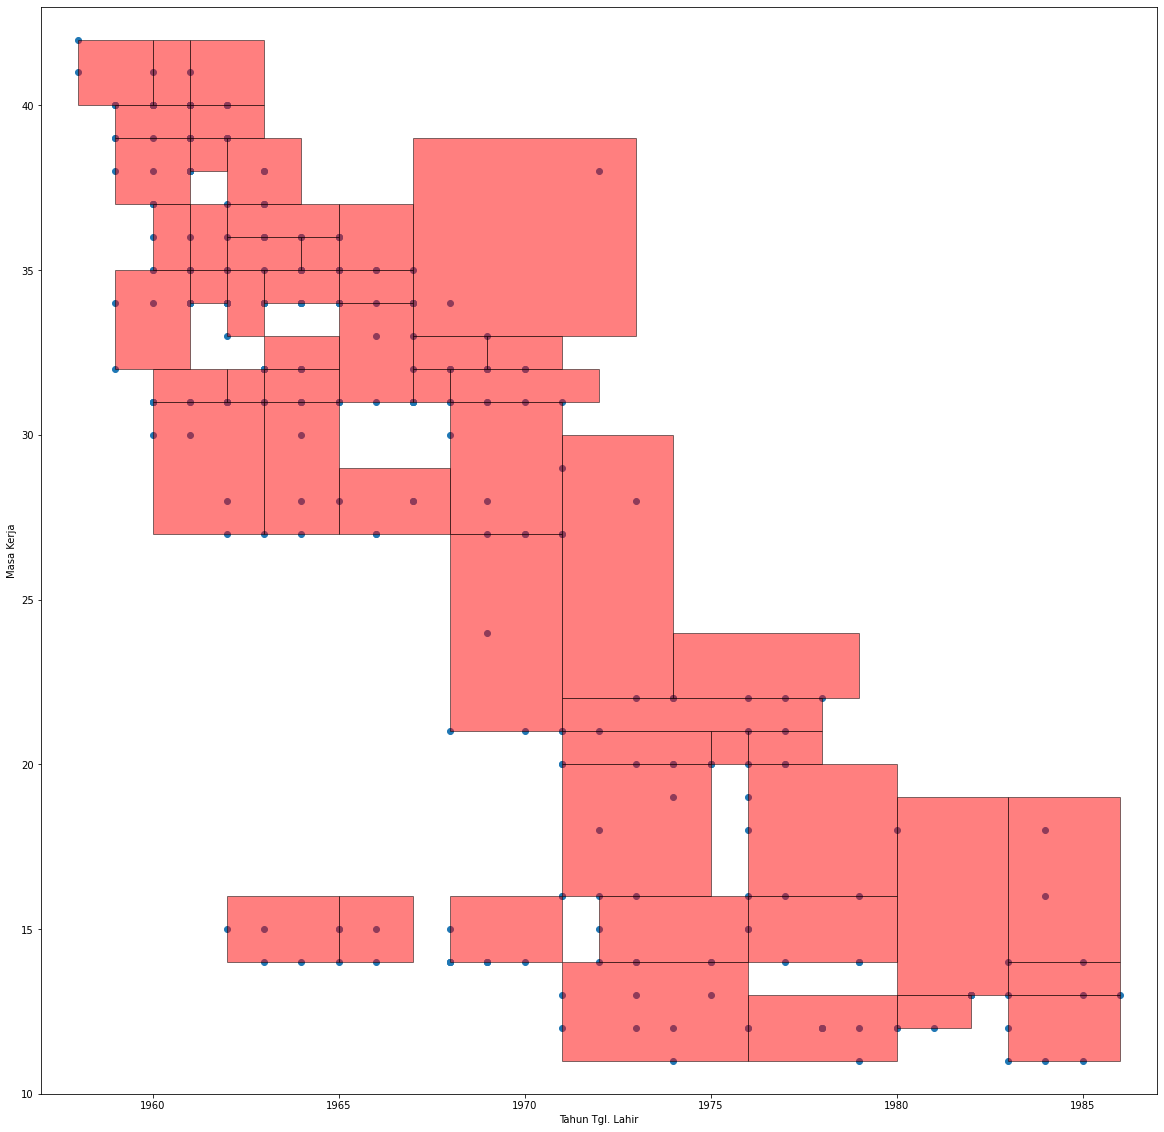

In [ ]:
pl.figure(figsize=(20,20))
ax = pl.subplot(111)
plot_rects(dataset_without_private_column, ax, rects, column_x, column_y, facecolor='r')
pl.scatter(dataset_without_private_column[column_x], dataset_without_private_column[column_y])
pl.show()

# Generating an k-Anonymous Dataset

Of course, to use the data we want to produce a new dataset that contains one row for each partition and value of the sensitive attribute. To do this, we need to aggregate the columns in each partition.  Let's do this!

In [ ]:
def agg_categorical_column(series):
    return [','.join(set(series))]

def agg_numerical_column(series):
    return [series.mean()]

In [ ]:
def build_anonymized_dataset(df, partitions, feature_columns, sensitive_column, max_partitions=None):
    aggregations = {}
    for column in feature_columns:
        if column in categorical:
            aggregations[column] = agg_categorical_column
        else:
            aggregations[column] = agg_numerical_column
    rows = []
    for i, partition in enumerate(partitions):
        if i % 100 == 1:
            print("Finished {} partitions...".format(i))
        if max_partitions is not None and i > max_partitions:
            break
        grouped_columns = df.loc[partition].agg(aggregations, squeeze=False)
        sensitive_counts = df.loc[partition].groupby(sensitive_column).agg({sensitive_column : 'count'})
        values = grouped_columns.iloc[0].to_dict()
        for sensitive_value, count in sensitive_counts[sensitive_column].items():
            if count == 0:
                continue
            values.update({
                sensitive_column : sensitive_value,
                'count' : count,

            })
            rows.append(values.copy())
    return pd.DataFrame(rows)

In [ ]:
anonymized_data = build_anonymized_dataset(dataset_without_private_column, finished_partitions, feature_columns, sensitive_column)

Finished 1 partitions...


In [ ]:
# save the dataset
anonymized_data.to_csv(path_drive + 'anonymized_dataset.csv', index=False)

# we sort the resulting dataframe using the feature columns and the sensitive attribute
anonymized_data.sort_values(feature_columns+[sensitive_column])

,Tahun Tgl. Lahir,Masa Kerja,JABATAN,count
142,1958.600000,40.600000,Kepala Biro Administrasi Akademik dan Kemahasiswaan,1
143,1958.600000,40.600000,Pengadministrasi Poliklinik,1
144,1958.600000,40.600000,Pranata Lab. Pendidikan Penyelia,1
145,1958.600000,40.600000,Pustakawan Madya,2
10,1959.333333,33.333333,Caraka,1
...,...,...,...,...
235,1984.000000,15.500000,Pengolah Data Akademik,2
236,1984.000000,15.500000,Teknisi Sarana dan Prasarana Kantor,1
231,1984.666667,13.000000,Pengadministrasi Akademik,1
232,1984.666667,13.000000,Pengadministrasi Persuratan,1
